In [0]:
%matplotlib inline
from fastai.basics import *

이번 튜토리얼에서는 SGD (Stochastic Gradient Descent)를 다룬다.

신경망에서 자주 사용되는 최적화(optimization) 기법중 하나이다.

#  Linear Regression problem

선형 회귀의 목적은 여러 점(데이터)들에 하나의 선을 맞추는 것이다.(fit)

일단 예제에 사용할 데이터셋을 만들어 보자.

In [0]:
n=100

In [3]:
x = torch.ones(n,2) # fastai를 import 하니 torch도 import 된다.
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.4460,  1.0000],
        [-0.6582,  1.0000],
        [-0.4693,  1.0000],
        [-0.2308,  1.0000],
        [-0.6753,  1.0000]])

In [4]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

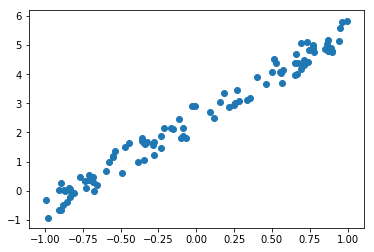

In [6]:
plt.scatter(x[:,0], y);

적절한 `a` 라는 파라메터 (가중치)를 찾는 것이 선형 회귀의 최종 목적이다.

(적절한 `a`를 찾으면 *에러*를 최소화하게 된다.)

아래 mse 에러를 함수로 정의하고, 매 스탭마다 해당 함수의 리턴값을 최소화 하는 `a`를 찾아보자.

In [0]:
def mse(y_hat, y): 
    return ((y_hat-y)**2).mean()

우리가 `a = (-1.0,1.0)` 라고 가정하고 `y_hat` 을 계산해보자. 

(y_hat == 모델의 예측값 (x@a))

In [0]:
a = tensor(-1.,1)

In [9]:
y_hat = x@a
mse(y_hat, y)

tensor(8.3735)

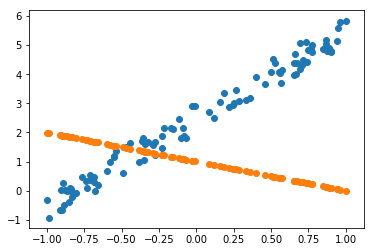

In [10]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

MSE 가 8.3735가 나온것을 확인

지금까지는 모델을 우리의 예측(손)으로 작성하였다. 이제 최적화 작업을 진행해야 한다. 즉, 최적의 `a` 값을 찾는 과정을 진행해 보자.

# Gradient Descent

우리는 mse_loss 를 최소화하는 `a` 값을 찾으면 된다.

**경사 하강법** 이란 함수(loss function)를 최소화하는 알고리즘이다. 

자세한 설명은 [여기](https://developers.google.com/machine-learning/crash-course/reducing-loss/gradient-descent?hl=ko)





파이토치로 경사 하강법을 구현해 보자

In [11]:
a = nn.Parameter(a) # a 를 학습 가능한 파라메터로 지정해 준다.
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a # dot product
    loss = mse(y, y_hat)
    if t % 10 == 0: 
        print(loss)
    loss.backward() # 역전파 수행
    with torch.no_grad(): # 기울기 계산 off
        a.sub_(lr * a.grad) #
        a.grad.zero_()      #

[pytorch 에서 `연산_` 의 의미](https://stackoverflow.com/questions/52920098/what-does-the-underscore-suffix-in-pytorch-functions-mean)

==> 요약하자면, _를 붙이면 inplace 로 연산하므로 메모리 절약이 되지만, 가능하면 사용하지 않기를 추천함 (텐서의 기울기 계산에서 오류 있다고 함)

In [13]:
lr = 1e-1
for t in range(100): 
    update()

tensor(8.3735, grad_fn=<MeanBackward0>)
tensor(1.3199, grad_fn=<MeanBackward0>)
tensor(0.3193, grad_fn=<MeanBackward0>)
tensor(0.1306, grad_fn=<MeanBackward0>)
tensor(0.0944, grad_fn=<MeanBackward0>)
tensor(0.0874, grad_fn=<MeanBackward0>)
tensor(0.0860, grad_fn=<MeanBackward0>)
tensor(0.0858, grad_fn=<MeanBackward0>)
tensor(0.0857, grad_fn=<MeanBackward0>)
tensor(0.0857, grad_fn=<MeanBackward0>)


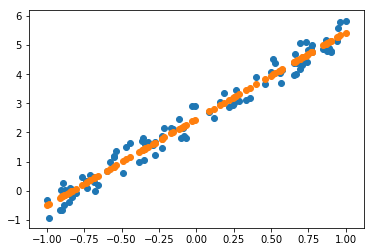

In [14]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [16]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

실제로는 모든 데이터를 모두 한번에 넣어 학습하지 않는다. 대신 mini-batch 를 사용한다. (batch 사이즈 만큼 데이터를 쪼개서 학습)

이때, 배치 사이즈가 1이면 즉, 하나의 데이터 만으로 학습하고 파라미터를 업데이트 하는 것이 SGD 이다. [배치](https://nonmeyet.tistory.com/entry/Batch-MiniBatch-Stochastic-%EC%A0%95%EC%9D%98%EC%99%80-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EC%98%88%EC%8B%9C)

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.